### **Machine Learning Foundations**

Capstone Project - Teaching Assistant Performance Evaluation

Registration Number - DSA_0308


In [165]:
import numpy as np
import pandas as pd

# Data visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

Load Data

In [166]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tae/tae.data'

data = pd.read_csv(file_name, header=None)
data.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


Pre-process Data for Training

In [167]:
data.columns = ['English Speaking', 
                'Course instructor',
                'Course',
                'Semester',
                'Class size',
                'Performance']

data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
English Speaking,151.0,1.807947,0.395225,1.0,2.0,2.0,2.0,2.0
Course instructor,151.0,13.642384,6.825779,1.0,8.0,13.0,20.0,25.0
Course,151.0,8.105960,7.023914,1.0,3.0,4.0,15.0,26.0
Semester,151.0,1.847682,0.360525,1.0,2.0,2.0,2.0,2.0
Class size,151.0,27.867550,12.893758,3.0,19.0,27.0,37.0,66.0
Performance,151.0,2.019868,0.820327,1.0,1.0,2.0,3.0,3.0


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   English Speaking   151 non-null    int64
 1   Course instructor  151 non-null    int64
 2   Course             151 non-null    int64
 3   Semester           151 non-null    int64
 4   Class size         151 non-null    int64
 5   Performance        151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [169]:
data['id'] = data.index+1
data

,English Speaking,Course instructor,Course,Semester,Class size,Performance,id
0,1,23,3,1,19,3,1
1,2,15,3,1,17,3,2
2,1,23,3,2,49,3,3
3,1,5,2,2,33,3,4
4,2,7,11,2,55,3,5
...,...,...,...,...,...,...,...
146,2,3,2,2,26,1,147
147,2,10,3,2,12,1,148
148,1,18,7,2,48,1,149
149,2,22,1,2,51,1,150


In [170]:
data.columns

Index(['English Speaking', 'Course instructor', 'Course', 'Semester',
       'Class size', 'Performance', 'id'],
      dtype='object')

In [171]:
data['Performance'].value_counts()

3    52
2    50
1    49
Name: Performance, dtype: int64

,English Speaking,Course instructor,Course,Semester,Class size,Performance
English Speaking,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Performance,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


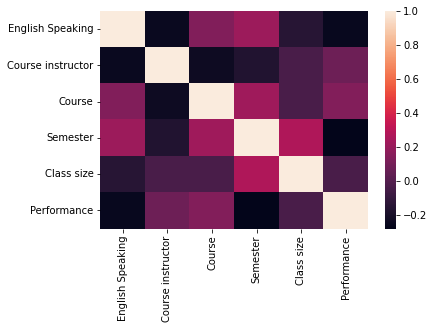

In [172]:
correlation_matrix = data[['English Speaking','Course instructor','Course','Semester','Class size','Performance']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

In [173]:
X_variables = ['English Speaking','Course instructor','Course','Semester','Class size']
data[X_variables].head()

,English Speaking,Course instructor,Course,Semester,Class size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55


In [174]:
y_varibale = 'Performance'
data[y_varibale].head()

0    3
1    3
2    3
3    3
4    3
Name: Performance, dtype: int64

In [175]:
X = data[X_variables].values
X

array([[ 1, 23,  3,  1, 19],
       [ 2, 15,  3,  1, 17],
       [ 1, 23,  3,  2, 49],
       [ 1,  5,  2,  2, 33],
       [ 2,  7, 11,  2, 55],
       [ 2, 23,  3,  1, 20],
       [ 2,  9,  5,  2, 19],
       [ 2, 10,  3,  2, 27],
       [ 1, 22,  3,  1, 58],
       [ 2, 15,  3,  1, 20],
       [ 2, 10, 22,  2,  9],
       [ 2, 13,  1,  2, 30],
       [ 2, 18, 21,  2, 29],
       [ 2,  6, 17,  2, 39],
       [ 2,  6, 17,  2, 42],
       [ 2,  6, 17,  2, 43],
       [ 2,  7, 11,  2, 10],
       [ 2, 22,  3,  2, 46],
       [ 2, 13,  3,  1, 10],
       [ 2,  7, 25,  2, 42],
       [ 2, 25,  7,  2, 27],
       [ 2, 25,  7,  2, 23],
       [ 2,  2,  9,  2, 31],
       [ 2,  1, 15,  1, 22],
       [ 2, 15, 13,  2, 37],
       [ 2,  7, 11,  2, 13],
       [ 2,  8,  3,  2, 24],
       [ 2, 14, 15,  2, 38],
       [ 2, 21,  2,  2, 42],
       [ 2, 22,  3,  2, 28],
       [ 2, 11,  1,  2, 51],
       [ 2, 18,  5,  2, 19],
       [ 2, 13,  1,  2, 31],
       [ 1, 13,  3,  1, 13],
       [ 2,  5

In [176]:
y = data[y_varibale].values
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Data Pre-processing

In [177]:
def pre_processing(data):    
    data['id'] = data.index+1

    X_variables = ['English Speaking','Course instructor','Course','Semester','Class size']
    
    for x in list(set(X_variables) - set(data.columns)):
        data[x] = 0
        
    return data[X_variables]

Train Test Split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 105
Test sample size  = 46


Model Training Function

In [179]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='weighted', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted') 
  
    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  })

In [180]:
model0 = model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf_new', X_train, y_train, X_test, y_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


In [181]:
model0

{'accuracy': 0.717391304347826,
 'f1_score': 0.7130434782608697,
 'model': RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1),
 'model_name': 'rf_new',
 'precision': 0.7462827028044419}

In [182]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]

,model_name,model,accuracy,precision,f1_score
0,lgr1,"LogisticRegression(n_jobs=3, verbose=1)",0.543478,0.625000,0.529956
1,rf1,"(DecisionTreeClassifier(max_features='auto', r...",0.717391,0.746283,0.713043
2,rf2,"(DecisionTreeClassifier(max_features='auto', r...",0.717391,0.746283,0.713043
3,rf3,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.717391,0.746283,0.713043
4,rf4,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.717391,0.746283,0.713043


In [183]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,500], 'max_depth': [None, 10, 20]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 500]},
             pre_dispatch=2, verbose=3)

In [184]:
print(gs_model.best_params_) 

{'max_depth': None, 'n_estimators': 500}


In [185]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = gs_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       0.60      0.86      0.71        14
           2       0.75      0.56      0.64        16
           3       0.79      0.69      0.73        16

    accuracy                           0.70        46
   macro avg       0.71      0.70      0.69        46
weighted avg       0.72      0.70      0.69        46

[[12  1  1]
 [ 5  9  2]
 [ 3  2 11]]


In [186]:
model = models.query("model_name=='rf2'")
model 

,model_name,model,accuracy,precision,f1_score
2,rf2,"(DecisionTreeClassifier(max_features='auto', r...",0.717391,0.746283,0.713043


In [187]:
model = model['model'].values[0]
model

RandomForestClassifier(n_estimators=500, n_jobs=3, verbose=1)

Saving Best Model

In [188]:
import pickle

save_file = 'model_rf2_test.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [189]:
model_ = pickle.load(open(save_file, 'rb'))
model_

RandomForestClassifier(n_estimators=500, n_jobs=3, verbose=1)

In [190]:
import joblib

save_file = 'model_rf2_test.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [191]:
model_ = joblib.load(save_file)
model_

RandomForestClassifier(n_estimators=500, n_jobs=3, verbose=1)

Predict on a Sample Data

In [192]:
sample_input = data[['English Speaking','Course instructor','Course','Semester','Class size']].sample(10)
sample_input

,English Speaking,Course instructor,Course,Semester,Class size
91,2,9,5,2,24
69,2,11,1,2,51
10,2,10,22,2,9
137,2,22,1,2,42
35,2,16,8,2,36
5,2,23,3,1,20
92,2,18,25,2,25
135,2,12,8,2,24
58,2,7,25,2,42
100,1,6,17,2,35


In [193]:
pre_processing(sample_input)

,English Speaking,Course instructor,Course,Semester,Class size
91,2,9,5,2,24
69,2,11,1,2,51
10,2,10,22,2,9
137,2,22,1,2,42
35,2,16,8,2,36
5,2,23,3,1,20
92,2,18,25,2,25
135,2,12,8,2,24
58,2,7,25,2,42
100,1,6,17,2,35


In [194]:
model.predict_proba(pre_processing(sample_input))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.062     , 0.146     , 0.792     ],
       [0.862     , 0.02      , 0.118     ],
       [0.014     , 0.138     , 0.848     ],
       [0.64433333, 0.32      , 0.03566667],
       [0.882     , 0.112     , 0.006     ],
       [0.004     , 0.23594848, 0.76005152],
       [0.094     , 0.156     , 0.75      ],
       [0.186     , 0.72      , 0.094     ],
       [0.032     , 0.902     , 0.066     ],
       [0.044     , 0.788     , 0.168     ]])

Score Function

In [195]:
def score(input_data, model):
    return model.predict_proba(input_data)

In [196]:
prediction = score(input_data=pre_processing(sample_input), model=model)
prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.062     , 0.146     , 0.792     ],
       [0.862     , 0.02      , 0.118     ],
       [0.014     , 0.138     , 0.848     ],
       [0.64433333, 0.32      , 0.03566667],
       [0.882     , 0.112     , 0.006     ],
       [0.004     , 0.23594848, 0.76005152],
       [0.094     , 0.156     , 0.75      ],
       [0.186     , 0.72      , 0.094     ],
       [0.032     , 0.902     , 0.066     ],
       [0.044     , 0.788     , 0.168     ]])

Post-processing

In [197]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [198]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model))
output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([0.146     , 0.02      , 0.138     , 0.32      , 0.112     ,
       0.23594848, 0.156     , 0.72      , 0.902     , 0.788     ])

In [199]:
sample_input['prediction'] = post_processing(model.predict_proba(pre_processing(sample_input)))
sample_input

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


,English Speaking,Course instructor,Course,Semester,Class size,id,prediction
91,2,9,5,2,24,92,0.146000
69,2,11,1,2,51,70,0.020000
10,2,10,22,2,9,11,0.138000
137,2,22,1,2,42,138,0.320000
35,2,16,8,2,36,36,0.112000
5,2,23,3,1,20,6,0.235948
92,2,18,25,2,25,93,0.156000
135,2,12,8,2,24,136,0.720000
58,2,7,25,2,42,59,0.902000
100,1,6,17,2,35,101,0.788000


In [200]:
sample_output = post_processing(score(input_data=pre_processing(sample_input), model=model))
sample_output

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([0.146     , 0.02      , 0.138     , 0.32      , 0.112     ,
       0.23594848, 0.156     , 0.72      , 0.902     , 0.788     ])

Inference Pipeline

In [201]:
def app_prediction_function(input_data, model):
    return post_processing(score(input_data=pre_processing(input_data), model=model))

In [202]:
input_data = data[['English Speaking','Course instructor','Course','Semester','Class size']].sample(1)
print(input_data)
app_prediction_function(input_data, model)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s


    English Speaking  Course instructor  Course  Semester  Class size
12                 2                 18      21         2          29


[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


0.084

In [203]:
input_data = input_data.to_dict(orient='records')[0]
input_data

{'Class size': 29,
 'Course': 21,
 'Course instructor': 18,
 'English Speaking': 2,
 'Semester': 2,
 'id': 13}

In [204]:
input_data = pd.DataFrame([input_data])
input_data

,English Speaking,Course instructor,Course,Semester,Class size,id
0,2,18,21,2,29,13


Get Prediction

In [205]:
app_prediction_function(input_data, model)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


0.084